In [1]:
import numpy as np

In [5]:
npzfile = np.load('sns_4_4_4_L20_u2_2.npz')

In [6]:
npzfile['arr_0']

array([0.        , 0.21666156, 0.43332312, 0.64998469, 0.86664625,
       1.08330781, 1.29996937, 1.51663094, 1.7332925 , 1.94995406,
       2.16661562, 2.38327719, 2.59993875, 2.81660031, 3.03326187,
       3.24992343, 3.466585  , 3.68324656, 3.89990812, 4.11656968,
       4.33323125, 4.54989281, 4.76655437, 4.98321593, 5.1998775 ,
       5.41653906, 5.63320062, 5.84986218, 6.06652374, 6.28318531])

In [9]:
import sys
import numpy as np
sys.path.append("/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave")
from main import define_system, solve_and_test_small_system, solve_for_sns_system

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from solve_hamiltonian import solve_system
from system_class import System
from plots import plot_complex_function, plot_pairing_amplitude
from utilities import label_F_matrix

In [15]:
def test_phase_intial(max_num_iter=200, tol=1e-2):
    phase_array = np.linspace(0, 2*np.pi, 20)
    current_midle = np.zeros(len(phase_array))

    # define first utside, so that we can change phase and solve the same system (do not need to start from scratch to solve)
    print("#_________ Phase = ", phase_array[3], "_________#")
    system = System(phase=phase_array[3], L_y=15, L_z=15, L_sc_0=5, L_nc=5, L_sc=5, L_soc=0, mu_sc=0.9, mu_nc=0.9,mu_soc=0.85, u_sc=-4.2, beta=100)
    solve_system(system, max_num_iter, tol)
    current_arr = system.current_along_lattice()
    current_midle[0] = np.imag(current_arr)[system.L_sc_0 + system.L_nc // 2]

    site_x = np.linspace(0, system.L_x - 1, system.L_x - 1)
    plt.plot(site_x[1:], np.imag(current_arr)[1:], label="imag")
    plt.legend()
    plt.xlabel("lattice site [SC-NC-SC]/[5-5-5]")
    plt.ylabel("current I_x")
    plt.grid()
    plt.show()
    return system

#_________ Phase =  0.992081890607303 _________#
Hermition:  True
Iteration nr. 1


/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave/system_class.py:898: RuntimeWarning: divide by zero encountered in true_divide
  self.F_matrix[0, :] = self.F_matrix[0,:] / (self.F_matrix[0,:]/self.F_matrix[-1, :]) * phaseDiff
/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave/system_class.py:898: RuntimeWarning: invalid value encountered in true_divide
  self.F_matrix[0, :] = self.F_matrix[0,:] / (self.F_matrix[0,:]/self.F_matrix[-1, :]) * phaseDiff


num_delta_over_tol =  15  -- where total num lattice sites is  15
Iteration nr. 2
num_delta_over_tol =  15  -- where total num lattice sites is  15
Iteration nr. 3
num_delta_over_tol =  15  -- where total num lattice sites is  15
Iteration nr. 4
num_delta_over_tol =  15  -- where total num lattice sites is  15
Iteration nr. 5
num_delta_over_tol =  0  -- where total num lattice sites is  15


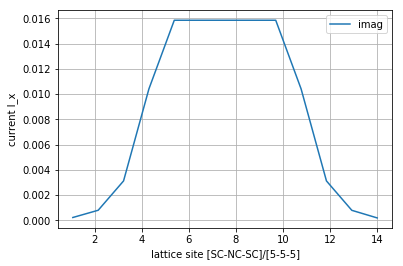

In [18]:
s = test_phase_intial()

In [32]:
phase_exp = s.F_matrix[:, 0]/abs(s.F_matrix[:,0])

In [33]:
s.F_matrix.shape

(15, 6)

In [34]:
lattice = np.linspace(0, s.F_matrix.shape[0], s.F_matrix.shape[0])

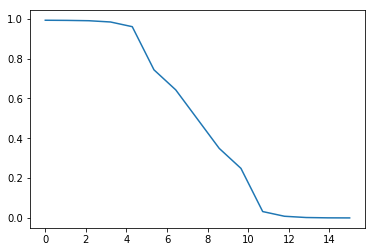

In [38]:
lattice = np.linspace(0, s.F_matrix.shape[0], s.F_matrix.shape[0])
plt.plot(lattice, np.imag(np.log(s.F_matrix[:, 0]/abs(s.F_matrix[:,0]))))

In [5]:
import numpy as np
a = 3.5 + 5.2j
b = 3

(39.290000000000006+0j)
